In [2]:
import re
import warnings
warnings.filterwarnings('ignore')
import string
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth',200)

#https://github.com/prateekjoshi565/twitter_sentiment_analysis/blob/master/code_sentiment_analysis.ipynb

In [3]:
train_data = pd.read_csv('train_E6oV3lV.csv')
test_data = pd.read_csv('test_tweets_anuFYb8.csv')

In [4]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [7]:
train_data.shape , test_data.shape

((31962, 3), (17197, 2))

In [8]:
train_data['label'].value_counts()  #it is an imbalanced classification challenge

0    29720
1     2242
Name: label, dtype: int64

In [6]:
train_data[train_data['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [5]:
train_data[train_data['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


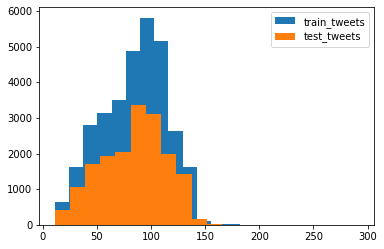

In [13]:
length_train = train_data['tweet'].str.len()
length_test = test_data['tweet'].str.len()
plt.hist(length_train, bins= 20,label = 'train_tweets')
plt.hist(length_test, bins= 20,label = 'test_tweets')
plt.legend()
plt.show()

In [14]:
combi = train_data.append(test_data, ignore_index=True)
combi.shape

(49159, 3)

# Text Cleaning

In [15]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [21]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[#]", " ")
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [22]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks lyft credit cause they offer wheelchair vans disapointed getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society motivation


# Tokenization

In [24]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction]
1    [thanks, lyft, credit, cause, they, offer, wheelchair, vans, disapointed, getthanked]
2                                                                  [bihday, your, majesty]
3                                                          [model, love, take, with, time]
4                                                        [factsguide, society, motivation]
Name: tidy_tweet, dtype: object

# Stemming

In [25]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                      [when, father, dysfunct, selfish, drag, kid, into, dysfunct]
1    [thank, lyft, credit, caus, they, offer, wheelchair, van, disapoint, getthank]
2                                                           [bihday, your, majesti]
3                                                   [model, love, take, with, time]
4                                                       [factsguid, societi, motiv]
Name: tidy_tweet, dtype: object

In [26]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

# Text Visualization

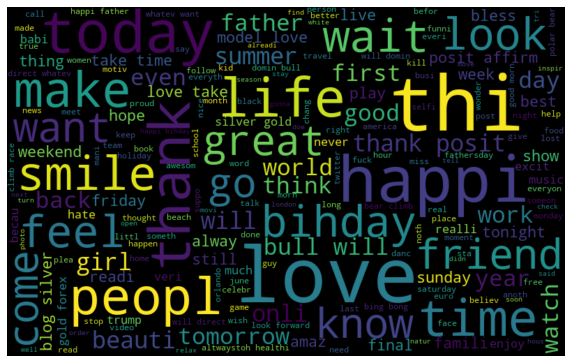

In [27]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

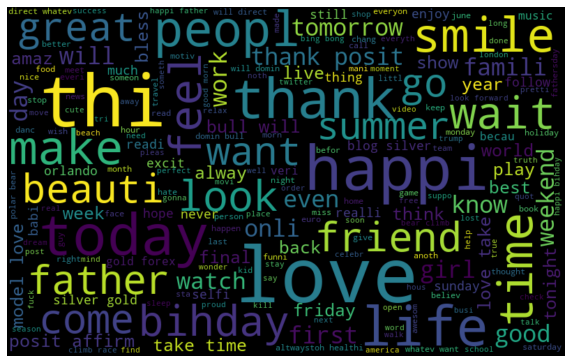

In [28]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

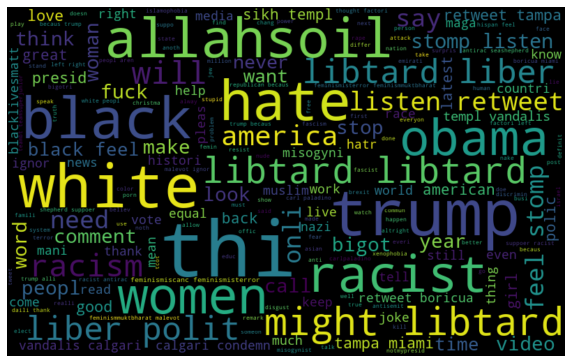

In [29]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [38]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

# Bag-of-Words Features

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [40]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

# TF-IDF Features

In [41]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

# Word Embeddings
1. Word2Vec Embeddings

In [57]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6360547, 7398000)

In [58]:
model_w2v.wv.most_similar(positive="dinner")

[('bolognes', 0.5645607113838196),
 ('seafood', 0.5438809394836426),
 ('spaghetti', 0.533480703830719),
 ('enrout', 0.5306733250617981),
 ('bihdaydinn', 0.528768002986908),
 ('foodcoma', 0.5286657810211182),
 ('surabaya', 0.5172464847564697),
 ('lobster', 0.5133510828018188),
 ('photoftheday', 0.513336181640625),
 ('whoopppp', 0.5125251412391663)]

In [59]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5675315856933594),
 ('unfit', 0.5589934587478638),
 ('dumptrump', 0.5547357797622681),
 ('tomlin', 0.5343201160430908),
 ('trumpleak', 0.5335378646850586),
 ('truism', 0.5297484397888184),
 ('versa', 0.5296684503555298),
 ('voteleav', 0.5294678211212158),
 ('irrefut', 0.528540313243866),
 ('unstabl', 0.5248106718063354)]

In [60]:
model_w2v['food']

array([-8.48765790e-01,  3.33648235e-01,  7.11516619e-01, -1.76424593e-01,
       -4.03544039e-01,  7.14654863e-01, -4.39949870e-01, -1.22772884e+00,
        2.10020334e-01, -3.03250939e-01, -3.03058058e-01,  3.70886177e-02,
       -3.92832279e-01,  5.61869517e-02, -3.78358692e-01,  5.77292778e-02,
        1.40504226e-01, -1.35295123e-01, -2.70287067e-01, -1.50090444e+00,
       -2.66298711e-01, -1.48299664e-01,  1.95694089e-01,  8.64041522e-02,
       -9.25862491e-02,  2.35387504e-01, -1.59574136e-01, -3.61036390e-01,
       -9.10950065e-01, -1.14473484e-01, -2.14665726e-01,  1.02866650e-01,
        3.31893533e-01,  2.96861053e-01,  2.37495646e-01,  5.20379126e-01,
       -4.79859978e-01,  2.90868729e-01, -8.47535655e-02,  1.85901299e-01,
       -5.50919585e-02,  2.89099783e-01,  4.90458667e-01, -1.62884414e-01,
        6.88485146e-01,  2.25559384e-01, -1.14353057e-02,  3.19985241e-01,
       -1.45658967e-03, -6.63119614e-01, -3.56656283e-01, -1.74128696e-01,
        7.56468832e-01, -

In [61]:
len(model_w2v['food']) #The length of the vector is 200

200

# Preparing Vectors for Tweets

In [62]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [63]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

#  Doc2Vec Embedding

In [64]:
#from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [65]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [66]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [67]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct'], tags=['tweet_0']),
 LabeledSentence(words=['thank', 'lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', 'disapoint', 'getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', 'motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', 'allshowandnogo'], tags=['tweet_5'])]

In [68]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|████████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 920756.61it/s]


In [72]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

# Preparing doc2vec Feature Set

In [70]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

# Building model using Bag-of-Words features

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_data['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5249169435215947

In [46]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_data['label'] = test_pred_int
submission = test_data[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) 

# Building model using TF-IDF features

In [53]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5354609929078015

# Word2Vec Features

In [73]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [74]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6123054114158636

# Doc2Vec Features

In [75]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [76]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.3521248915871639

# 2. Support Vector Machine

In [77]:
from sklearn import svm

In [78]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5055970149253731

In [81]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_data['label'] = test_pred_int
submission = test_data[['id','label']]
submission.to_csv('sub_svc_bow.csv', index=False)

In [82]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.514959202175884

In [83]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6038910505836576

In [84]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.17543859649122806

# 3. RandomForest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5458898643256186

In [89]:
test_pred = rf.predict(test_bow)
test_data['label'] = test_pred
submission = test_data[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [90]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5519125683060109

In [91]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.4924406047516198

In [92]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.06488011283497884

# 4. XGBoost

In [93]:
from xgboost import XGBClassifier

In [94]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5224564619615033

In [95]:
test_pred = xgb_model.predict(test_bow)
test_data['label'] = test_pred
submission = test_data[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

In [96]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5382538253825382

In [97]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)

In [98]:
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6394927536231884

In [99]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain)

In [100]:
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.34519956850053934